**Modelacion**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# VALIDACIÓN DE CERTIFICADOS DE DEFUNCIÓN DE NACIMIENTOS EN COLOMBIA

**Datos de la presentación**


* **Curso**: 901N

* **Autores**:

1. Andres Felipe Arevalo Moreno
2. Luis Alexander Pedraza Cuellar

In [2]:
# Paquetes numéricos
import numpy as np

# DataFrames/Procesamiento
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
from sklearn import tree #graficos para el arbol de desicion
import graphviz # mejora de la imagen

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Para dividir los datos (aleatorios)
from sklearn.model_selection import train_test_split

# Para crear clasificadores (la de nosotros)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Para crear predictores
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


# Para evaluar que tan bueno son nuestros modelos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## Modelado

In [ ]:
%cd '/content/drive/MyDrive/Datasets/nacimientos'

## 1- Cargar los datos (resultados)

In [ ]:
unidos = pd.read_csv(r"data/resultados.csv")
unidos.head()

In [ ]:
len(unidos.columns)

## 2 - Separar las entradas (X) y las salidas (Y)
**Y = wX + b**
* La ecuacion  anterior es igual a la utilizada para la generacion de un linea (y = mx + b)

Donde:
* Y = Corresponde al valor que se espera que el modelo prediga
* w = Es un peso calculado por el algoritmo para el modelo
* X = Son los datos que se daran al modelo para hacer la prediccion
* b = Corresponde al sesgo intrinseco de los datos que el modelo descubre 

<img width="578" src="https://www.iartificial.net/wp-content/uploads/2018/12/ejemplo-error-cuadratico-medio2.png">

Fuente: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.iartificial.net%2Fregresion-lineal-con-ejemplos-en-python%2F&psig=AOvVaw2D5C5-rQgHeFT5MPx5e3ox&ust=1651879384421000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCOj_irPAyfcCFQAAAAAdAAAAABAD

In [ ]:
#Se Genera una lista de los resultados que esperamos (y)
y = np.array(unidos['VIVOS'])
y

In [ ]:
#Dado que la columna a predecir no se incluira como entrada se remueve del dataframe
x = unidos.drop('VIVOS', axis=1)
x.head()

## 3. Partir los datos en Entrenamiento, Validacion y Pruebas

In [ ]:
#Se separa 70% para entrenar, 15% para validar y el restante 15% para pruebas 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

#tamaños
print('train:', y_train.shape[0])
print('Val:', y_val.shape[0])
print('Test:', y_test.shape[0])

## De aqui empezaria a correr

## Recargar los datos de los archivos test.csv, train.csv y val.csv

In [3]:
x_train = pd.DataFrame()
x_val = pd.DataFrame()
x_test = pd.DataFrame()

x_train =  pd.read_csv(r"data/train_x.csv")
x_val =  pd.read_csv(r"data/val_x.csv")
x_test =  pd.read_csv(r"data/test_x.csv")

y_train = pd.read_csv(r"data/train.csv")
y_val = pd.read_csv(r"data/val.csv")
y_test = pd.read_csv(r"data/test.csv")

## Algunos clasificadores

## Arbol de desiciones (clasificador)

Clasificador Tree Desition
train Exactitud (accuracy): 0.9663539852833792
val Exactitud (accuracy): 0.9617300131061599
test Exactitud (accuracy): 0.9682830930537353


[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.479\nsamples = 3815\nvalue = [1514, 2301]'),
 Text(0.25, 0.25, 'gini = 0.049\nsamples = 1467\nvalue = [1430, 37]'),
 Text(0.75, 0.25, 'gini = 0.069\nsamples = 2348\nvalue = [84, 2264]')]

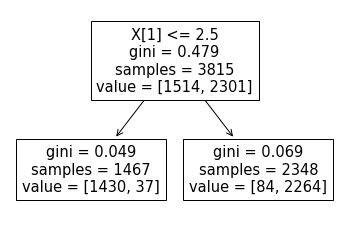

In [27]:
#este es el que pósiblemente nos vayamos, es el mas facil de explicar
print('Clasificador Tree Desition')
tree_desicion = DecisionTreeClassifier(max_depth = 1) #con esto controlo el tamaño del arbol
clf = tree_desicion.fit(x_test, y_test)

y_predict = tree_desicion.predict(x_val)
print('train Exactitud (accuracy):', tree_desicion.score(x_train,y_train))
print('val Exactitud (accuracy):', tree_desicion.score(x_val,y_val))
print('test Exactitud (accuracy):', tree_desicion.score(x_test,y_test))

tree.plot_tree(clf)

In [28]:
x_val

,SIT_PARTO,PESO_NAC,T_GES,TIPO_PARTO,MUL_PARTO,EDAD_MADRE,PROFESION,AREANAC_1,AREANAC_2,AREANAC_3,SEG_SOCIAL_1,SEG_SOCIAL_2,SEG_SOCIAL_3,SEG_SOCIAL_4,SEG_SOCIAL_5
0,1,5,4,1,1,3,1,1,0,0,1,0,0,0,0
1,1,6,4,2,1,3,1,1,0,0,0,0,0,0,1
2,1,4,3,2,2,5,1,1,0,0,0,1,0,0,0
3,1,5,4,1,1,3,1,1,0,0,0,1,0,0,0
4,1,7,5,2,1,5,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,1,1,2,2,1,3,1,1,0,0,1,0,0,0,0
3811,1,1,1,1,1,3,1,1,0,0,1,0,0,0,0
3812,1,1,1,1,1,5,1,1,0,0,1,0,0,0,0
3813,1,5,4,2,1,2,1,1,0,0,0,1,0,0,0


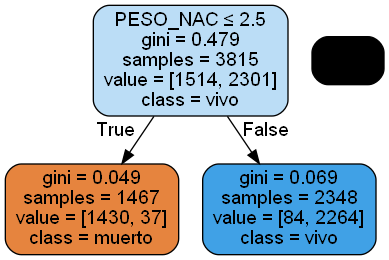

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,  
                filled = True, rounded = True,
                class_names=['muerto','vivo'],
                feature_names = x_val.columns,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Regresion lineal - Arbol de desicion

In [ ]:
print('Regresion lineal - arbol de desicion')
r1 = DecisionTreeRegressor()
r1.fit(x_train, y_train)
y_predict = r1.predict(x_val)
print(' R^2', r1.score(x_val, y_val))

## KNN (clasificador)

In [ ]:
print('Clasificador KNN')
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict = knn.predict(x_val)
print(' Exactitud (accuracy):', knn.score(x_val,y_val))

## Regresion lineal - KNN


In [ ]:
print('Regresion lineal - KNN')
r1 = KNeighborsRegressor()
r1.fit(x_train, y_train)
y_predict = r1.predict(x_val)
print(' R^2', r1.score(x_val, y_val))

## Sensibilidad

In [14]:
len(x_val), len(y_val), len(y_predict)

(3815, 3815, 3815)

#experimento, creo un dataframe

In [15]:
experimento = pd.DataFrame()

In [16]:
def resultados(row):
    try:
       
        if (row['Predicho']==1 and row['Y']==1):
            return 'VP' #Verdadero Positivo

        if (row['Predicho']==-1 and row['Y']==1):
            return 'FN' #Falso Negativo
        
        if (row['Predicho']==1 and row['Y']==-1):
            return 'FP' #Falso Positivo
        
        if (row['Predicho']==-1 and row['Y']==-1):
            return 'VN' #Verdadero Negativo
    except:
        return np.NaN #si hay problemas, no retorne nada

#Creamos un dataframe aparte para saber los verdaderos positivos

In [17]:
experimento['Predicho'] = y_predict
experimento['Y'] = y_val
experimento['?'] = experimento.apply(resultados,axis=1)
#experimento.to_csv(r"dataframe.csv") #esto lo genero para verificar cuantos datos tiene en el excel y ponerlo aqui en codigo para que haga todo el trabajo
experimento

,Predicho,Y,?
0,1,1,VP
1,1,1,VP
2,1,-1,FP
3,1,1,VP
4,1,1,VP
...,...,...,...
3810,-1,1,FN
3811,-1,-1,VN
3812,-1,-1,VN
3813,1,1,VP


#Este comando es para ver cuantos valores existe en una columna de dataframe, ya lo compare generando un excel aparte y si coinciden

In [18]:
experimento['?'].value_counts()

VP    2177
VN    1514
FP      89
FN      35
Name: ?, dtype: int64

#Hacemos un filtrado para quedarnos solo con la cantidad de valores en un numero entero

In [19]:
verdaderos_positivos = experimento[experimento['?'] == 'VP'] #aplico un filtrado de valores
verdaderos_negativos = experimento[experimento['?'] == 'VN'] #aplico un filtrado de valores
falsos_positivos = experimento[experimento['?'] == 'FP'] #aplico un filtrado de valores
falsos_negativos = experimento[experimento['?'] == 'FN'] #aplico un filtrado de valores

verdaderos_positivos = verdaderos_positivos['?'].count() #Esto me sirve para contar los valores de la columna interrogacion
verdaderos_negativos = verdaderos_negativos['?'].count() #Esto me sirve para contar los valores de la columna interrogacion
falsos_positivos = falsos_positivos['?'].count() #Esto me sirve para contar los valores de la columna interrogacion
falsos_negativos = falsos_negativos['?'].count() #Esto me sirve para contar los valores de la columna interrogacion

#Aplicamos la formula de la sensibilidad :D

## Formula - sensibilidad

In [20]:
sensibilidad = verdaderos_positivos/(verdaderos_positivos + falsos_negativos)
sensibilidad

0.9841772151898734

## Exactitud - sensibilidad

In [21]:
exactitud = sensibilidad*100
exactitud

98.41772151898735

## Presicion
Se calcula como:  VP/(VP+FP)

In [22]:
Presicion = verdaderos_positivos/(verdaderos_positivos + falsos_positivos)
Presicion

0.9607237422771403

## F1 SCORE - KNN
Esta es otra métrica muy empleada porque nos resume la precisión y sensibilidad en una sola métrica. Por ello es de gran utilidad cuando la distribución de las clases es desigual <br>
<img width="300" src="https://live.staticflickr.com/65535/48051297527_655abe34c2_b.jpg">

In [23]:
PuntajeF1 = (2*Presicion*sensibilidad)/(Presicion+sensibilidad)
PuntajeF1

0.9723090665475659

## 5- Validacion Cruzada

* Documentacion sobre Sklearn: https://scikit-learn.org/stable/user_guide.html
<center><img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/K-fold_cross_validation.jpg"></center><br>

Fuente: https://www.google.com/url?sa=i&url=https%3A%2F%2Fes.wikipedia.org%2Fwiki%2FValidaci%25C3%25B3n_cruzada&psig=AOvVaw1Dhmhr3MTwEqSOt5PP_Evr&ust=1652051988236000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCJDe9dTDzvcCFQAAAAAdAAAAABAJ

In [ ]:
#Se compara todos los modelos seleccionados usando el puntaje de un K-Fold
num_folds = 10 #Numero de particiones
scoring = "neg_mean_squared_error" # https://scikit-learn.org/stable/modules/model_

#lista de algoritmos
#ver: https://scikit-learn.org/stable/supervised_learning.html
models = []
models.append(('Log Reg', LogisticRegression()))
models.append(('SVM Reg', SVC()))
models.append(('KNN Reg', KNeighborsClassifier()))

models.append(('LR',LinearRegression()))
models.append(('SVR',SVC()))
models.append(('KNNR', KNeighborsRegressor()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('Tree', DecisionTreeClassifier()))

results = []
names = []

print('Resultados')
kfold = KFold(n_splits=num_folds)
for name, model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

## 6- Comparacion de resultados

In [ ]:
#Graficamos los resultados para una comparacion mas heavy ;)
fig = plt.figure()
fig.suptitle('Comparacion de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Esto lo genero el profe

In [ ]:
#len(x_val), len(y_val), len(y_predict)
print(y_val[0:10], y_predict[0:10])            
